<a href="https://colab.research.google.com/github/Aulia2699/DeepLearningTask/blob/main/TaskWeek4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NAMA   : AULIA RAHMA

NPM    : 2306319426

In [ ]:
!pip install d2l

8.1 Deep Convolutional Neural Networks

In [ ]:
import torch
from torch import nn
from d2l import torch as d2l

In [ ]:
class AlexNet(d2l.Classifier):
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.LazyConv2d(96, kernel_size=11, stride=4, padding=1),
            nn.ReLU(), nn.MaxPool2d(kernel_size=3, stride=2),
            nn.LazyConv2d(256, kernel_size=5, padding=2), nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.LazyConv2d(384, kernel_size=3, padding=1), nn.ReLU(),
            nn.LazyConv2d(384, kernel_size=3, padding=1), nn.ReLU(),
            nn.LazyConv2d(256, kernel_size=3, padding=1), nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2), nn.Flatten(),
            nn.LazyLinear(4096), nn.ReLU(), nn.Dropout(p=0.5),
            nn.LazyLinear(4096), nn.ReLU(),nn.Dropout(p=0.5),
            nn.LazyLinear(num_classes))
        self.net.apply(d2l.init_cnn)

In [ ]:
AlexNet().layer_summary((1, 1, 224, 224))

Conv2d output shape:	 torch.Size([1, 96, 54, 54])
ReLU output shape:	 torch.Size([1, 96, 54, 54])
MaxPool2d output shape:	 torch.Size([1, 96, 26, 26])
Conv2d output shape:	 torch.Size([1, 256, 26, 26])
ReLU output shape:	 torch.Size([1, 256, 26, 26])
MaxPool2d output shape:	 torch.Size([1, 256, 12, 12])
Conv2d output shape:	 torch.Size([1, 384, 12, 12])
ReLU output shape:	 torch.Size([1, 384, 12, 12])
Conv2d output shape:	 torch.Size([1, 384, 12, 12])
ReLU output shape:	 torch.Size([1, 384, 12, 12])
Conv2d output shape:	 torch.Size([1, 256, 12, 12])
ReLU output shape:	 torch.Size([1, 256, 12, 12])
MaxPool2d output shape:	 torch.Size([1, 256, 5, 5])
Flatten output shape:	 torch.Size([1, 6400])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1,

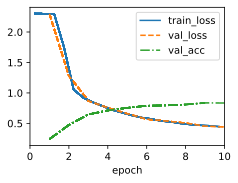

In [ ]:
model = AlexNet(lr=0.01)
data = d2l.FashionMNIST(batch_size=128, resize=(224, 224))
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
trainer.fit(model, data)

Exercise


1.   

*   Layer konvolusi: Memerlukan banyak memori karena menyimpan feature
maps besar, terutama di lapisan awal. Layer fully connected: Mendominasi pada bagian akhir jaringan karena setiap neuron terhubung dengan setiap neuron di lapisan sebelumnya.Dominasi: Layer fully connected mendominasi memori pada bagian akhir, meskipun convolusi awal memiliki footprint besar.

*   Layer konvolusi: Memiliki biaya komputasi lebih tinggi karena proses konvolusi melibatkan banyak operasi pengali-akumulasi pada filter dan input besar. Contoh: layer pertama AlexNet menggunakan 96 filter pada input 224x224x3. Layer fully connected: Meski memerlukan lebih sedikit unit, layer ini masih melibatkan operasi perkalian matriks besar di lapisan akhir. Dominasi: Layer konvolusi cenderung mendominasi biaya komputasi, terutama di awal jaringan.
*   Bandwidth memori: Latensi memori dan bandwidth berperan penting, terutama selama pelatihan. Latensi yang lebih rendah mempercepat akses data selama proses inferensi. Namun, pelatihan lebih tergantung pada bandwidth karena lebih banyak data yang harus diambil dari memori. Latensi vs. ukuran: Pelatihan memerlukan lebih banyak akses memori karena membutuhkan penyimpanan dan perhitungan gradien, sementara inferensi lebih ringan karena hanya melalui satu arah (forward pass).


2.   Dalam mendesain chip, ada trade-off antara kekuatan komputasi dan bandwidth memori. Meningkatkan bandwidth memori mengurangi bottleneck dalam transfer data, tetapi memerlukan area chip yang lebih besar dan daya lebih tinggi. Optimisasi: Penggunaan paralelisme dalam komputasi bisa membantu, tetapi pastikan memori cukup cepat untuk menghindari bottleneck.
3. AlexNet telah dilampaui oleh arsitektur yang lebih efisien seperti ResNet dan EfficientNet yang menghasilkan akurasi lebih tinggi dengan parameter yang lebih sedikit dan lebih hemat komputasi.
4. AlexNet membutuhkan lebih banyak epoch dibandingkan LeNet, karena kapasitasnya yang besar memungkinkannya belajar pola yang lebih kompleks. Namun, ini juga meningkatkan risiko overfitting jika tidak ada regularisasi yang tepat.
5.

*   Fashion-MNIST terdiri dari gambar resolusi rendah (28x28), sehingga AlexNet terlalu rumit untuk dataset ini. Menyederhanakan arsitektur AlexNet (mengurangi filter atau layer) dapat mempercepat pelatihan tanpa mengorbankan akurasi secara signifikan.
*   Mengurangi jumlah filter di setiap layer atau memperkecil layer fully connected bisa membuat AlexNet lebih ringan dan efisien untuk dataset seperti Fashion-MNIST.
6. Menambah ukuran batch meningkatkan throughput (jumlah gambar yang diproses per detik), tetapi ukuran batch yang terlalu besar dapat mengurangi generalisasi karena gradien yang lebih halus.
7. Dropout membantu mencegah overfitting dengan menonaktifkan beberapa neuron secara acak selama pelatihan. ReLU mempercepat pelatihan dibandingkan fungsi aktivasi lain seperti sigmoid. Preprocessing seperti normalisasi atau augmentasi data dapat meningkatkan performa lebih lanjut.
8. Menghapus dropout atau regularisasi lainnya dapat menyebabkan overfitting, terutama pada dataset kecil. Overfitting dapat terjadi ketika model menjadi terlalu kompleks dan mulai menghafal data pelatihan alih-alih belajar pola yang dapat digeneralisasi ke data baru.







8.2 Network Using Blocks (VGG)

In [ ]:
import torch
from torch import nn
from d2l import torch as d2l

In [ ]:
def vgg_block(num_convs, out_channels):
    layers = []
    for _ in range(num_convs):
        layers.append(nn.LazyConv2d(out_channels, kernel_size=3, padding=1))
        layers.append(nn.ReLU())
    layers.append(nn.MaxPool2d(kernel_size=2,stride=2))
    return nn.Sequential(*layers)

In [ ]:
class VGG(d2l.Classifier):
    def __init__(self, arch, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        conv_blks = []
        for (num_convs, out_channels) in arch:
            conv_blks.append(vgg_block(num_convs, out_channels))
        self.net = nn.Sequential(
            *conv_blks, nn.Flatten(),
            nn.LazyLinear(4096), nn.ReLU(), nn.Dropout(0.5),
            nn.LazyLinear(4096), nn.ReLU(), nn.Dropout(0.5),
            nn.LazyLinear(num_classes))
        self.net.apply(d2l.init_cnn)

In [ ]:
VGG(arch=((1, 64), (1, 128), (2, 256), (2, 512), (2, 512))).layer_summary(
    (1, 1, 224, 224))

Sequential output shape:	 torch.Size([1, 64, 112, 112])
Sequential output shape:	 torch.Size([1, 128, 56, 56])
Sequential output shape:	 torch.Size([1, 256, 28, 28])
Sequential output shape:	 torch.Size([1, 512, 14, 14])
Sequential output shape:	 torch.Size([1, 512, 7, 7])
Flatten output shape:	 torch.Size([1, 25088])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 10])


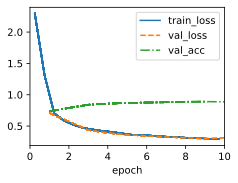

In [ ]:
model = VGG(arch=((1, 16), (1, 32), (2, 64), (2, 128), (2, 128)), lr=0.01)
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128, resize=(224, 224))
model.apply_init([next(iter(data.get_dataloader(True)))[0]], d2l.init_cnn)
trainer.fit(model, data)

Exrcise
1.

*   Perbandingan Jumlah Parameter AlexNet dan VGG: AlexNet memiliki sekitar 60 juta parameter. VGG-16 memiliki sekitar 138 juta parameter. Hal ini terjadi karena VGG menggunakan layer konvolusi yang lebih dalam dengan filter lebih kecil (3x3) yang meningkatkan jumlah parameter.
*    Perbandingan Floating Point Operations (FLOPs): AlexNet: FLOPs lebih rendah, terutama karena layer konvolusi yang lebih sedikit dan fully connected yang besar. VGG: FLOPs lebih tinggi karena lapisan konvolusi yang dalam, meskipun fully connected layers masih signifikan.
*   Mengurangi Biaya Komputasi pada Fully Connected Layers: Salah satu cara untuk mengurangi biaya komputasi pada fully connected layers adalah dengan menggunakan teknik global average pooling untuk menggantikan layer fully connected yang besar. Ini secara dramatis mengurangi jumlah parameter sekaligus mempertahankan performa model.
2. Ke Mana Pergi Tiga Layer Lainnya? Tiga layer tambahan pada VGG yang tidak terlihat pada representasi adalah layer ReLU dan max pooling yang ditempatkan setelah setiap konvolusi. Layer ini tidak selalu dihitung sebagai layer eksplisit dalam representasi arsitektur.

3. Membangun Model Lain dari Tabel 1 di VGG Paper: Dari tabel 1 di makalah VGG, Anda dapat membangun model seperti VGG-16 dan VGG-19. Keduanya berbeda dalam jumlah layer konvolusi. VGG-16 memiliki 16 lapisan yang dapat dilatih (13 konvolusi + 3 fully connected), sedangkan VGG-19 memiliki 19 lapisan (16 konvolusi + 3 fully connected).

4. Modifikasi Resolusi Input Fashion-MNIST: Menaikkan resolusi Fashion-MNIST dari 28x28 menjadi 224x224 sangat boros dan tidak efisien. Sebagai alternatif, Anda dapat mengubah resolusi menjadi 56x56 atau 84x84 untuk mengurangi beban komputasi. Anda bisa menambahkan non-linearitas tambahan sebelum downsampling (seperti yang disarankan oleh makalah VGG) untuk mempertahankan akurasi jaringan meskipun input resolusi diubah.




8.3 Network in Network (NiN)

In [ ]:
import torch
from torch import nn
from d2l import torch as d2l

In [ ]:
def nin_block(out_channels, kernel_size, strides, padding):
    return nn.Sequential(
        nn.LazyConv2d(out_channels, kernel_size, strides, padding), nn.ReLU(),
        nn.LazyConv2d(out_channels, kernel_size=1), nn.ReLU(),
        nn.LazyConv2d(out_channels, kernel_size=1), nn.ReLU())

In [ ]:
class NiN(d2l.Classifier):
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nin_block(96, kernel_size=11, strides=4, padding=0),
            nn.MaxPool2d(3, stride=2),
            nin_block(256, kernel_size=5, strides=1, padding=2),
            nn.MaxPool2d(3, stride=2),
            nin_block(384, kernel_size=3, strides=1, padding=1),
            nn.MaxPool2d(3, stride=2),
            nn.Dropout(0.5),
            nin_block(num_classes, kernel_size=3, strides=1, padding=1),
            nn.AdaptiveAvgPool2d((1, 1)),
            nn.Flatten())
        self.net.apply(d2l.init_cnn)

In [ ]:
VGG(arch=((1, 64), (1, 128), (2, 256), (2, 512), (2, 512))).layer_summary(
    (1, 1, 224, 224))

Sequential output shape:	 torch.Size([1, 64, 112, 112])
Sequential output shape:	 torch.Size([1, 128, 56, 56])
Sequential output shape:	 torch.Size([1, 256, 28, 28])
Sequential output shape:	 torch.Size([1, 512, 14, 14])
Sequential output shape:	 torch.Size([1, 512, 7, 7])
Flatten output shape:	 torch.Size([1, 25088])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 10])


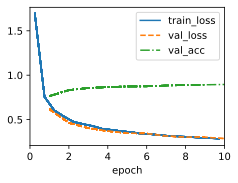

In [ ]:
model = VGG(arch=((1, 16), (1, 32), (2, 64), (2, 128), (2, 128)), lr=0.01)
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128, resize=(224, 224))
model.apply_init([next(iter(data.get_dataloader(True)))[0]], d2l.init_cnn)
trainer.fit(model, data)

Exercise
1. Mengapa Ada Dua Layer Konvolusi 1x1 per Blok NiN? Penjelasan: Layer konvolusi 1x1 digunakan untuk memetakan fitur dengan lebih efektif, mengurangi dimensi saluran, dan menambah non-linearitas. Dengan dua layer, NiN dapat menangkap lebih banyak fitur non-linear. Meningkatkan jadi tiga: Menambah layer konvolusi 1x1 akan meningkatkan non-linearitas dan kompleksitas model, yang dapat meningkatkan akurasi tetapi dengan lebih banyak komputasi. Mengurangi jadi satu: Mengurangi jumlah layer menjadi satu akan mengurangi kemampuan model untuk menangkap fitur yang kompleks, mungkin mengurangi performa akurasi tetapi mempercepat komputasi.

2. Mengganti Konvolusi 1x1 dengan Konvolusi 3x3: Konvolusi 1x1 digunakan terutama untuk mereduksi dimensi saluran tanpa memengaruhi dimensi spasial. Konvolusi 3x3 meningkatkan ukuran filter, memungkinkan model menangkap lebih banyak informasi spasial. Namun, ini akan meningkatkan biaya komputasi dan jumlah parameter secara signifikan.

3. Mengganti Global Average Pooling dengan Fully Connected Layer: Speed: Menggunakan fully connected layer akan memperlambat model karena lebih banyak operasi diperlukan. Akurasi: Fully connected layer dapat meningkatkan akurasi pada dataset yang lebih kompleks karena lebih fleksibel dalam menangani data, tetapi bisa overfitting pada dataset kecil. Jumlah Parameter: Fully connected layer meningkatkan jumlah parameter secara drastis dibandingkan dengan global average pooling, yang tidak memiliki parameter.

4. Menghitung Penggunaan Sumber Daya untuk NiN:
*   Jumlah Parameter: Jumlah parameter bergantung pada ukuran layer konvolusi dan fully connected yang digunakan, terutama layer 1x1.
*   Biaya Komputasi: Jumlah operasi floating point (FLOPs) meningkat seiring kedalaman jaringan dan jumlah filter.
*   Memori yang Dibutuhkan Saat Pelatihan: Memori pelatihan termasuk menyimpan activations, gradien, dan parameter. Ini lebih besar daripada saat inferensi.
*   Memori untuk Inferensi: Selama prediksi, hanya parameter model dan input yang disimpan, sehingga memori yang dibutuhkan lebih sedikit dibandingkan saat pelatihan.
5. Masalah Mengurangi Representasi dari 384 x 5 x 5 menjadi 10 x 5 x 5 dalam Satu Langkah: Reduksi yang drastis dalam representasi dapat menyebabkan hilangnya informasi spasial dan fitur penting. Ini bisa mengakibatkan performa model yang buruk karena penurunan detail dan resolusi dalam satu langkah.
6. Merancang Keluarga Jaringan NiN-Like Berdasarkan Desain VGG: Mengadopsi desain modular seperti VGG dengan menggunakan blok konvolusi berulang dapat diterapkan pada NiN. Misalnya, menggunakan beberapa blok konvolusi kecil (1x1 atau 3x3) dengan pooling yang diulang beberapa kali (mirip dengan pendekatan VGG-16 dan VGG-19). Jaringan ini dapat disesuaikan dengan menambah atau mengurangi kedalaman tergantung pada kebutuhan spesifik dataset atau tugas yang dihadapi.




8.4 Multi-Branch *Networks*

In [ ]:
import torch
from torch import nn
from torch.nn import functional as F
from d2l import torch as d2l

In [ ]:
class Inception(nn.Module):
    # c1--c4 are the number of output channels for each branch
    def __init__(self, c1, c2, c3, c4, **kwargs):
        super(Inception, self).__init__(**kwargs)
        # Branch 1
        self.b1_1 = nn.LazyConv2d(c1, kernel_size=1)
        # Branch 2
        self.b2_1 = nn.LazyConv2d(c2[0], kernel_size=1)
        self.b2_2 = nn.LazyConv2d(c2[1], kernel_size=3, padding=1)
        # Branch 3
        self.b3_1 = nn.LazyConv2d(c3[0], kernel_size=1)
        self.b3_2 = nn.LazyConv2d(c3[1], kernel_size=5, padding=2)
        # Branch 4
        self.b4_1 = nn.MaxPool2d(kernel_size=3, stride=1, padding=1)
        self.b4_2 = nn.LazyConv2d(c4, kernel_size=1)

    def forward(self, x):
        b1 = F.relu(self.b1_1(x))
        b2 = F.relu(self.b2_2(F.relu(self.b2_1(x))))
        b3 = F.relu(self.b3_2(F.relu(self.b3_1(x))))
        b4 = F.relu(self.b4_2(self.b4_1(x)))
        return torch.cat((b1, b2, b3, b4), dim=1)

In [ ]:
class GoogleNet(d2l.Classifier):
    def b1(self):
        return nn.Sequential(
            nn.LazyConv2d(64, kernel_size=7, stride=2, padding=3),
            nn.ReLU(), nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

In [ ]:
@d2l.add_to_class(GoogleNet)
def b2(self):
    return nn.Sequential(
        nn.LazyConv2d(64, kernel_size=1), nn.ReLU(),
        nn.LazyConv2d(192, kernel_size=3, padding=1), nn.ReLU(),
        nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

In [ ]:
@d2l.add_to_class(GoogleNet)
def b3(self):
    return nn.Sequential(Inception(64, (96, 128), (16, 32), 32),
                         Inception(128, (128, 192), (32, 96), 64),
                         nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

In [ ]:
@d2l.add_to_class(GoogleNet)
def b4(self):
    return nn.Sequential(Inception(192, (96, 208), (16, 48), 64),
                         Inception(160, (112, 224), (24, 64), 64),
                         Inception(128, (128, 256), (24, 64), 64),
                         Inception(112, (144, 288), (32, 64), 64),
                         Inception(256, (160, 320), (32, 128), 128),
                         nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

In [ ]:
@d2l.add_to_class(GoogleNet)
def b5(self):
    return nn.Sequential(Inception(256, (160, 320), (32, 128), 128),
                         Inception(384, (192, 384), (48, 128), 128),
                         nn.AdaptiveAvgPool2d((1,1)), nn.Flatten())

In [ ]:
@d2l.add_to_class(GoogleNet)
def __init__(self, lr=0.1, num_classes=10):
    super(GoogleNet, self).__init__()
    self.save_hyperparameters()
    self.net = nn.Sequential(self.b1(), self.b2(), self.b3(), self.b4(),
                             self.b5(), nn.LazyLinear(num_classes))
    self.net.apply(d2l.init_cnn)

In [ ]:
model = GoogleNet().layer_summary((1, 1, 96, 96))

Sequential output shape:	 torch.Size([1, 64, 24, 24])
Sequential output shape:	 torch.Size([1, 192, 12, 12])
Sequential output shape:	 torch.Size([1, 480, 6, 6])
Sequential output shape:	 torch.Size([1, 832, 3, 3])
Sequential output shape:	 torch.Size([1, 1024])
Linear output shape:	 torch.Size([1, 10])


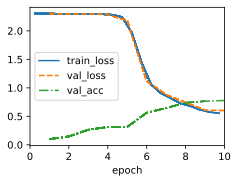

In [ ]:
model = GoogleNet(lr=0.01)
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128, resize=(96, 96))
model.apply_init([next(iter(data.get_dataloader(True)))[0]], d2l.init_cnn)
trainer.fit(model, data)

Exercise
1. Iterasi pada GoogleNet:
*   Batch Normalization: Tambahkan layer batch normalization setelah setiap konvolusi untuk meningkatkan stabilitas dan kecepatan pelatihan, sesuai dengan Ioffe dan Szegedy (2015).
*  Penyesuaian Blok Inception: Modifikasi blok Inception (seperti penambahan lebar dan perubahan urutan konvolusi) untuk meningkatkan efisiensi, sesuai Szegedy et al. (2016).
*   Label Smoothing: Terapkan label smoothing sebagai bentuk regularisasi untuk mengurangi overconfidence model, seperti dijelaskan dalam Szegedy et al. (2016).
*   Residual Connections: Tambahkan residual connections dalam blok Inception untuk membantu pelatihan jaringan yang lebih dalam, sesuai dengan Szegedy et al. (2017).
2. Ukuran Gambar Minimum untuk GoogLeNet:
Ukuran gambar minimum yang digunakan oleh GoogLeNet adalah sekitar 224x224 piksel karena desain arsitektur yang memerlukan fitur spasial yang cukup besar di lapisan awal.
3. Desain GoogLeNet untuk Fashion-MNIST:
Untuk resolusi 28x28 piksel dari Fashion-MNIST, arsitektur GoogLeNet perlu disederhanakan:
Stem: Bisa dikurangi layer awal, seperti mengurangi jumlah filter di layer konvolusi pertama.
Body: Blok Inception mungkin membutuhkan lebih sedikit saluran dan ukuran filter yang lebih kecil.
Head: Global average pooling tetap bisa digunakan untuk menghindari fully connected layers besar.
4. Perbandingan Ukuran Parameter:
AlexNet: Sekitar 60 juta parameter.
VGG: VGG-16 memiliki sekitar 138 juta parameter.
NiN: Memiliki jauh lebih sedikit parameter dengan penggunaan konvolusi 1x1 yang mengurangi kompleksitas.
GoogLeNet: Menggunakan arsitektur Inception untuk mengurangi parameter secara signifikan, hanya memiliki sekitar 7 juta parameter. Ini terjadi karena penggunaan konvolusi 1x1 dan penyatuan jalur berbeda di blok Inception.
5. Perbandingan Komputasi GoogLeNet dan AlexNet:
AlexNet memiliki lebih sedikit layer konvolusi dan jumlah parameter besar pada layer fully connected, sedangkan GoogLeNet lebih dalam tetapi mengurangi jumlah parameter dengan blok Inception.
Dari segi biaya komputasi, GoogLeNet lebih efisien meskipun lebih dalam.
Desain chip akselerator untuk GoogLeNet membutuhkan cache dan bandwidth memori lebih efisien karena kompleksitas komputasi terdistribusi ke lebih banyak jalur konvolusi paralel yang lebih kecil.



8.5 Batch Normalization

In [ ]:
import torch
from torch import nn
from d2l import torch as d2l

In [ ]:
def batch_norm(X, gamma, beta, moving_mean, moving_var, eps, momentum):
    # Use is_grad_enabled to determine whether we are in training mode
    if not torch.is_grad_enabled():
        # In prediction mode, use mean and variance obtained by moving average
        X_hat = (X - moving_mean) / torch.sqrt(moving_var + eps)
    else:
        assert len(X.shape) in (2, 4)
        if len(X.shape) == 2:
            # When using a fully connected layer, calculate the mean and
            # variance on the feature dimension
            mean = X.mean(dim=0)
            var = ((X - mean) ** 2).mean(dim=0)
        else:
            # When using a two-dimensional convolutional layer, calculate the
            # mean and variance on the channel dimension (axis=1). Here we
            # need to maintain the shape of X, so that the broadcasting
            # operation can be carried out later
            mean = X.mean(dim=(0, 2, 3), keepdim=True)
            var = ((X - mean) ** 2).mean(dim=(0, 2, 3), keepdim=True)
        # In training mode, the current mean and variance are used
        X_hat = (X - mean) / torch.sqrt(var + eps)
        # Update the mean and variance using moving average
        moving_mean = (1.0 - momentum) * moving_mean + momentum * mean
        moving_var = (1.0 - momentum) * moving_var + momentum * var
    Y = gamma * X_hat + beta  # Scale and shift
    return Y, moving_mean.data, moving_var.data

In [ ]:
class BatchNorm(nn.Module):
    # num_features: the number of outputs for a fully connected layer or the
    # number of output channels for a convolutional layer. num_dims: 2 for a
    # fully connected layer and 4 for a convolutional layer
    def __init__(self, num_features, num_dims):
        super().__init__()
        if num_dims == 2:
            shape = (1, num_features)
        else:
            shape = (1, num_features, 1, 1)
        # The scale parameter and the shift parameter (model parameters) are
        # initialized to 1 and 0, respectively
        self.gamma = nn.Parameter(torch.ones(shape))
        self.beta = nn.Parameter(torch.zeros(shape))
        # The variables that are not model parameters are initialized to 0 and
        # 1
        self.moving_mean = torch.zeros(shape)
        self.moving_var = torch.ones(shape)

    def forward(self, X):
        # If X is not on the main memory, copy moving_mean and moving_var to
        # the device where X is located
        if self.moving_mean.device != X.device:
            self.moving_mean = self.moving_mean.to(X.device)
            self.moving_var = self.moving_var.to(X.device)
        # Save the updated moving_mean and moving_var
        Y, self.moving_mean, self.moving_var = batch_norm(
            X, self.gamma, self.beta, self.moving_mean,
            self.moving_var, eps=1e-5, momentum=0.1)
        return Y

In [ ]:
class BNLeNetScratch(d2l.Classifier):
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.LazyConv2d(6, kernel_size=5), BatchNorm(6, num_dims=4),
            nn.Sigmoid(), nn.AvgPool2d(kernel_size=2, stride=2),
            nn.LazyConv2d(16, kernel_size=5), BatchNorm(16, num_dims=4),
            nn.Sigmoid(), nn.AvgPool2d(kernel_size=2, stride=2),
            nn.Flatten(), nn.LazyLinear(120),
            BatchNorm(120, num_dims=2), nn.Sigmoid(), nn.LazyLinear(84),
            BatchNorm(84, num_dims=2), nn.Sigmoid(),
            nn.LazyLinear(num_classes))

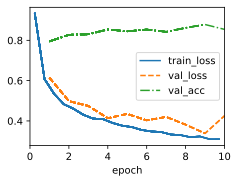

In [ ]:
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128)
model = BNLeNetScratch(lr=0.1)
model.apply_init([next(iter(data.get_dataloader(True)))[0]], d2l.init_cnn)
trainer.fit(model, data)

In [ ]:
model.net[1].gamma.reshape((-1,)), model.net[1].beta.reshape((-1,))

(tensor([1.9037, 1.8736, 2.0264, 1.6748, 1.5374, 2.4373], device='cuda:0',
        grad_fn=<ViewBackward0>),
 tensor([-0.0397,  0.3772, -1.3884, -1.0249, -0.8279,  1.0319], device='cuda:0',
        grad_fn=<ViewBackward0>))

In [ ]:
class BNLeNet(d2l.Classifier):
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.LazyConv2d(6, kernel_size=5), nn.LazyBatchNorm2d(),
            nn.Sigmoid(), nn.AvgPool2d(kernel_size=2, stride=2),
            nn.LazyConv2d(16, kernel_size=5), nn.LazyBatchNorm2d(),
            nn.Sigmoid(), nn.AvgPool2d(kernel_size=2, stride=2),
            nn.Flatten(), nn.LazyLinear(120), nn.LazyBatchNorm1d(),
            nn.Sigmoid(), nn.LazyLinear(84), nn.LazyBatchNorm1d(),
            nn.Sigmoid(), nn.LazyLinear(num_classes))

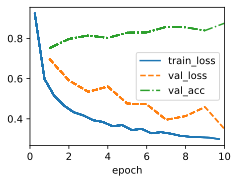

In [ ]:
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128)
model = BNLeNet(lr=0.1)
model.apply_init([next(iter(data.get_dataloader(True)))[0]], d2l.init_cnn)
trainer.fit(model, data)

Exercise
1. Ya, karena batch normalization sudah melakukan normalisasi dengan mengatur rata-rata dan varians dari input, maka parameter bias menjadi tidak diperlukan. Batch normalization secara efektif menggantikan fungsi bias dengan menormalisasi output dari layer sebelumnya.
2. Perbandingan Learning Rate dengan dan Tanpa Batch Normalization:
  a. Plot Kenaikan Akurasi Validasi: Batch normalization biasanya meningkatkan stabilitas pembelajaran sehingga akurasi validasi dapat meningkat lebih cepat dibandingkan tanpa batch normalization.
  b. Batas Learning Rate Sebelum Optimasi Gagal: Tanpa batch normalization, learning rate yang terlalu tinggi akan menyebabkan model tidak konvergen. Batch normalization memungkinkan penggunaan learning rate yang lebih besar karena stabilisasi gradien selama pembelajaran.
3. Batch normalization tidak selalu diperlukan di setiap layer. Biasanya, layer awal dan fully connected layer lebih diuntungkan dari normalisasi, tetapi layer terakhir mungkin tidak memerlukannya.
4. Implementasi Versi "Lite" Batch Normalization:
Menghapus Mean: Menghilangkan rata-rata tanpa menormalkan varians bisa mempercepat pembelajaran tetapi tidak seefektif versi lengkap.
Menghapus Varians: Menghilangkan varians bisa mengurangi perbedaan skala, tetapi model masih bisa terkena masalah offset.
5. Mengunci Parameter Beta dan Gamma:
Jika parameter beta dan gamma dikunci, efeknya mirip dengan penghapusan mean dan varians standar. Hal ini bisa mengurangi fleksibilitas model, dan model mungkin tidak dapat belajar representasi yang optimal.
6. Mengganti Dropout dengan Batch Normalization:
Dropout dan batch normalization memiliki tujuan berbeda. Dropout digunakan untuk regularisasi dengan mematikan neuron secara acak selama pelatihan, sedangkan batch normalization menormalkan output layer. Batch normalization bisa meningkatkan kecepatan pelatihan, tetapi tidak selalu menggantikan regularisasi yang diberikan oleh dropout.
7. Penelitian tentang Transformasi Normalisasi Lain:
  a. Probability Integral Transform: Ini bisa diterapkan, tetapi perhitungannya mungkin lebih kompleks.
  b. Full-Rank Covariance Estimate: Penggunaan ini tidak efisien karena memerlukan banyak komputasi dan penyimpanan.
  c. Matrix Variants (Block-Diagonal, Low-Displacement Rank): Penggunaan matriks ini bisa mengurangi beban komputasi dan memori, tetapi implementasinya lebih kompleks.
  d. Sparsification Compression sebagai Regularizer: Sparsifikasi bisa bertindak sebagai regularizer dengan mengurangi kompleksitas model.
  e. Proyeksi Lainnya: Transformasi berbasis grup simetri atau proyeksi khusus lainnya bisa digunakan sebagai bentuk regularisasi tambahan atau untuk menangkap sifat geometris data.

8.6 Residual Networks (ResNet) and ResNext

In [ ]:
import torch
from torch import nn
from torch.nn import functional as F
from d2l import torch as d2l

In [ ]:
class Residual(nn.Module):
    """The Residual block of ResNet models."""
    def __init__(self, num_channels, use_1x1conv=False, strides=1):
        super().__init__()
        self.conv1 = nn.LazyConv2d(num_channels, kernel_size=3, padding=1,
                                   stride=strides)
        self.conv2 = nn.LazyConv2d(num_channels, kernel_size=3, padding=1)
        if use_1x1conv:
            self.conv3 = nn.LazyConv2d(num_channels, kernel_size=1,
                                       stride=strides)
        else:
            self.conv3 = None
        self.bn1 = nn.LazyBatchNorm2d()
        self.bn2 = nn.LazyBatchNorm2d()

    def forward(self, X):
        Y = F.relu(self.bn1(self.conv1(X)))
        Y = self.bn2(self.conv2(Y))
        if self.conv3:
            X = self.conv3(X)
        Y += X
        return F.relu(Y)

In [ ]:
blk = Residual(3)
X = torch.randn(4, 3, 6, 6)
blk(X).shape

torch.Size([4, 3, 6, 6])

In [ ]:
blk = Residual(6, use_1x1conv=True, strides=2)
blk(X).shape

torch.Size([4, 6, 3, 3])

In [ ]:
class ResNet(d2l.Classifier):
    def b1(self):
        return nn.Sequential(
            nn.LazyConv2d(64, kernel_size=7, stride=2, padding=3),
            nn.LazyBatchNorm2d(), nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

In [ ]:
@d2l.add_to_class(ResNet)
def block(self, num_residuals, num_channels, first_block=False):
    blk = []
    for i in range(num_residuals):
        if i == 0 and not first_block:
            blk.append(Residual(num_channels, use_1x1conv=True, strides=2))
        else:
            blk.append(Residual(num_channels))
    return nn.Sequential(*blk)

In [ ]:
@d2l.add_to_class(ResNet)
def __init__(self, arch, lr=0.1, num_classes=10):
    super(ResNet, self).__init__()
    self.save_hyperparameters()
    self.net = nn.Sequential(self.b1())
    for i, b in enumerate(arch):
        self.net.add_module(f'b{i+2}', self.block(*b, first_block=(i==0)))
    self.net.add_module('last', nn.Sequential(
        nn.AdaptiveAvgPool2d((1, 1)), nn.Flatten(),
        nn.LazyLinear(num_classes)))
    self.net.apply(d2l.init_cnn)

In [ ]:
class ResNet18(ResNet):
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__(((2, 64), (2, 128), (2, 256), (2, 512)),
                       lr, num_classes)

ResNet18().layer_summary((1, 1, 96, 96))

Sequential output shape:	 torch.Size([1, 64, 24, 24])
Sequential output shape:	 torch.Size([1, 64, 24, 24])
Sequential output shape:	 torch.Size([1, 128, 12, 12])
Sequential output shape:	 torch.Size([1, 256, 6, 6])
Sequential output shape:	 torch.Size([1, 512, 3, 3])
Sequential output shape:	 torch.Size([1, 10])


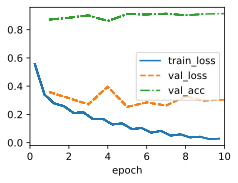

In [ ]:
model = ResNet18(lr=0.01)
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128, resize=(96, 96))
model.apply_init([next(iter(data.get_dataloader(True)))[0]], d2l.init_cnn)
trainer.fit(model, data)

In [ ]:
class ResNeXtBlock(nn.Module):
    """The ResNeXt block."""
    def __init__(self, num_channels, groups, bot_mul, use_1x1conv=False,
                 strides=1):
        super().__init__()
        bot_channels = int(round(num_channels * bot_mul))
        self.conv1 = nn.LazyConv2d(bot_channels, kernel_size=1, stride=1)
        self.conv2 = nn.LazyConv2d(bot_channels, kernel_size=3,
                                   stride=strides, padding=1,
                                   groups=bot_channels//groups)
        self.conv3 = nn.LazyConv2d(num_channels, kernel_size=1, stride=1)
        self.bn1 = nn.LazyBatchNorm2d()
        self.bn2 = nn.LazyBatchNorm2d()
        self.bn3 = nn.LazyBatchNorm2d()
        if use_1x1conv:
            self.conv4 = nn.LazyConv2d(num_channels, kernel_size=1,
                                       stride=strides)
            self.bn4 = nn.LazyBatchNorm2d()
        else:
            self.conv4 = None

    def forward(self, X):
        Y = F.relu(self.bn1(self.conv1(X)))
        Y = F.relu(self.bn2(self.conv2(Y)))
        Y = self.bn3(self.conv3(Y))
        if self.conv4:
            X = self.bn4(self.conv4(X))
        return F.relu(Y + X)

In [ ]:
blk = ResNeXtBlock(32, 16, 1)
X = torch.randn(4, 32, 96, 96)
blk(X).shape

torch.Size([4, 32, 96, 96])

Exercise
1. Perbedaan antara Inception Block dan Residual Block
  
  Inception Block:
  
  Arsitektur: Memanfaatkan beberapa ukuran filter secara bersamaan (misalnya, 1x1, 3x3, 5x5) untuk menangkap fitur dari berbagai skala. Ini meningkatkan kemampuan ekstraksi fitur dari gambar.
  
  Komputasi: Memerlukan lebih banyak operasi dan parameter karena mengaplikasikan berbagai ukuran filter sekaligus.
  
  Akurasitas: Mampu mencapai akurasi tinggi dengan menangkap berbagai pola, tetapi lebih rentan terhadap overfitting karena kompleksitasnya.

  Fungsi: Dapat mendeskripsikan fungsi yang lebih kompleks karena kemampuan menangkap fitur dari berbagai skala dan konteks.

  Residual Block:

  Arsitektur: Menggunakan shortcut connections yang mengalirkan informasi langsung dari lapisan sebelumnya ke lapisan berikutnya. Ini membantu mencegah masalah vanishing gradient pada jaringan yang dalam.

  Komputasi: Umumnya lebih efisien dibandingkan dengan Inception Block karena hanya memerlukan satu set operasi (biasanya 3x3) dan menambahkan shortcut.

  Akurasitas: Lebih efektif dalam melatih jaringan yang dalam dengan akurasi yang lebih tinggi karena membantu konvergensi lebih cepat.

  Fungsi: Mampu mendeskripsikan fungsi yang kompleks dengan efisiensi yang
  lebih baik, memanfaatkan pendekatan residu untuk pembelajaran.

2. Mengimplementasikan Berbagai Variasi Jaringan
Untuk mengimplementasikan berbagai variasi jaringan ResNet, merujuk pada Tabel 1 dalam makalah ResNet oleh He et al. (2016) diperlukan untuk membuat model dengan arsitektur yang berbeda seperti ResNet-18, ResNet-34, ResNet-50, dan seterusnya. Setiap varian berbeda dalam jumlah lapisan dan kompleksitas, di mana ResNet-50 dan yang lebih dalam menggunakan arsitektur bottleneck untuk mengurangi jumlah parameter sambil tetap mempertahankan kemampuan ekstraksi fitur yang baik.

3. Mengimplementasikan Arsitektur Bottleneck
Arsitektur bottleneck dalam ResNet diperkenalkan untuk mengurangi kompleksitas model dengan memanfaatkan tiga lapisan konvolusi, di mana lapisan pertama adalah konvolusi 1x1 untuk mengurangi dimensi, diikuti oleh konvolusi 3x3, dan diakhiri dengan konvolusi 1x1 untuk mengembalikan dimensi. Pendekatan ini mengurangi jumlah parameter yang diperlukan sambil mempertahankan atau meningkatkan performa model pada tugas pengenalan gambar.

4. Mengubah Struktur Menjadi "Batch Normalization, Activation, Convolution"
Perubahan urutan struktur menjadi “Batch Normalization, Activation, Convolution” dilakukan untuk meningkatkan stabilitas dan kecepatan pelatihan. Dengan melakukan batch normalization sebelum aktivasi, model dapat mempercepat konvergensi dan mengurangi masalah yang berkaitan dengan pergeseran distribusi data di setiap lapisan. Hal ini berdampak positif pada kinerja model, terutama dalam jaringan yang dalam.

5. Mengapa Kita Tidak Dapat Meningkatkan Kompleksitas Fungsi Tanpa Batas?
Meningkatkan kompleksitas fungsi tanpa batas dapat menyebabkan beberapa masalah utama:

Overfitting: Model yang terlalu kompleks dapat belajar dari noise dalam data pelatihan, yang mengurangi kemampuannya untuk generalisasi pada data baru.
Kebutuhan Data: Fungsi kompleks membutuhkan lebih banyak data untuk dilatih secara efektif. Tanpa jumlah data yang cukup, model tidak dapat belajar pola yang sebenarnya.
Komputasi yang Berlebihan: Meningkatkan kompleksitas model meningkatkan kebutuhan sumber daya komputasi, yang dapat menjadi tidak praktis.

Solusi:Penggunaan teknik regularisasi seperti dropout untuk mencegah overfitting.
Validasi silang untuk menilai kinerja model secara menyeluruh dan menghindari overfitting.
Memilih model dengan kompleksitas yang sesuai berdasarkan data yang tersedia dan kebutuhan aplikasi.

8.7 Densely Connected Networks (DenseNet)

In [ ]:
import torch
from torch import nn
from d2l import torch as d2l

In [ ]:
def conv_block(num_channels):
    return nn.Sequential(
        nn.LazyBatchNorm2d(), nn.ReLU(),
        nn.LazyConv2d(num_channels, kernel_size=3, padding=1))

In [ ]:
class DenseBlock(nn.Module):
    def __init__(self, num_convs, num_channels):
        super(DenseBlock, self).__init__()
        layer = []
        for i in range(num_convs):
            layer.append(conv_block(num_channels))
        self.net = nn.Sequential(*layer)

    def forward(self, X):
        for blk in self.net:
            Y = blk(X)
            # Concatenate input and output of each block along the channels
            X = torch.cat((X, Y), dim=1)
        return X

In [ ]:
blk = DenseBlock(2, 10)
X = torch.randn(4, 3, 8, 8)
Y = blk(X)
Y.shape

torch.Size([4, 23, 8, 8])

In [ ]:
def transition_block(num_channels):
    return nn.Sequential(
        nn.LazyBatchNorm2d(), nn.ReLU(),
        nn.LazyConv2d(num_channels, kernel_size=1),
        nn.AvgPool2d(kernel_size=2, stride=2))

In [ ]:
blk = transition_block(10)
blk(Y).shape

torch.Size([4, 10, 4, 4])

In [ ]:
class DenseNet(d2l.Classifier):
    def b1(self):
        return nn.Sequential(
            nn.LazyConv2d(64, kernel_size=7, stride=2, padding=3),
            nn.LazyBatchNorm2d(), nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

In [ ]:
@d2l.add_to_class(DenseNet)
def __init__(self, num_channels=64, growth_rate=32, arch=(4, 4, 4, 4),
             lr=0.1, num_classes=10):
    super(DenseNet, self).__init__()
    self.save_hyperparameters()
    self.net = nn.Sequential(self.b1())
    for i, num_convs in enumerate(arch):
        self.net.add_module(f'dense_blk{i+1}', DenseBlock(num_convs,
                                                          growth_rate))
        # The number of output channels in the previous dense block
        num_channels += num_convs * growth_rate
        # A transition layer that halves the number of channels is added
        # between the dense blocks
        if i != len(arch) - 1:
            num_channels //= 2
            self.net.add_module(f'tran_blk{i+1}', transition_block(
                num_channels))
    self.net.add_module('last', nn.Sequential(
        nn.LazyBatchNorm2d(), nn.ReLU(),
        nn.AdaptiveAvgPool2d((1, 1)), nn.Flatten(),
        nn.LazyLinear(num_classes)))
    self.net.apply(d2l.init_cnn)

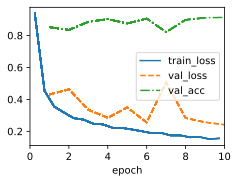

In [ ]:
model = DenseNet(lr=0.01)
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128, resize=(96, 96))
trainer.fit(model, data)

Exercises

1. Average Pooling digunakan di layer transisi untuk mengurangi dimensi fitur sambil mempertahankan informasi yang lebih lengkap tentang distribusi fitur. Max-pooling hanya mengambil nilai maksimum dari fitur, yang dapat menyebabkan hilangnya informasi penting. Average pooling memberikan representasi yang lebih baik dari fitur secara keseluruhan, sehingga memungkinkan model untuk lebih baik dalam belajar pola yang lebih kompleks.

2. DenseNet memiliki parameter model yang lebih kecil dibandingkan ResNet karena pendekatan dense connectivity-nya. Dalam DenseNet, setiap layer menerima input dari semua layer sebelumnya, sehingga memungkinkan untuk menggunakan fitur yang telah diekstraksi tanpa perlu mengulang parameter. Ini mengurangi kebutuhan untuk banyak neuron yang redundant dan memungkinkan model untuk belajar representasi yang lebih efisien, sehingga mengurangi jumlah parameter yang diperlukan.

3.
   3.1. Ya, DenseNet sering dikritik karena konsumsi memori yang tinggi, terutama pada GPU. Hal ini disebabkan oleh fakta bahwa setiap layer terhubung dengan semua layer sebelumnya, yang menyebabkan akumulasi data yang besar saat proses pelatihan. Dalam prakteknya, hal ini dapat terlihat saat input shape diubah menjadi 224 x 224, di mana penggunaan memori meningkat secara signifikan.

  3.2. Salah satu cara untuk mengurangi konsumsi memori adalah dengan menggunakan teknik seperti gradient checkpointing. Teknik ini mengurangi jumlah data yang disimpan selama pelatihan dengan hanya menyimpan hasil lapisan tertentu dan menghitung kembali gradien untuk lapisan lainnya saat diperlukan. Untuk menerapkan ini, framework perlu disesuaikan dengan menambahkan checkpoint pada lapisan-lapisan tertentu sehingga memori yang dibutuhkan dapat diminimalkan.

4. Implementasi berbagai versi DenseNet, seperti DenseNet-121, DenseNet-169, dan DenseNet-201, dapat dilakukan dengan merujuk pada tabel 1 dalam makalah DenseNet oleh Huang et al. (2017). Setiap versi berbeda dalam jumlah lapisan dan kompleksitas, dan implementasi ini umumnya melibatkan pengaturan layer dense dan transition dengan parameter yang sesuai.

5. Untuk menerapkan ide DenseNet dalam model MLP (Multi-Layer Perceptron), kita dapat mendesain jaringan di mana setiap layer terhubung ke semua layer sebelumnya, mirip dengan arsitektur DenseNet. Dalam konteks prediksi harga rumah, model ini dapat menerima berbagai fitur (misalnya, luas, jumlah kamar, lokasi) sebagai input, dan melatih model untuk memprediksi harga berdasarkan kombinasi fitur yang telah diekstraksi dari semua layer sebelumnya. Dengan menggunakan struktur dense, model diharapkan dapat menangkap interaksi yang lebih kompleks antara fitur-fitur tersebut.

8.8 Designing Convolution Network Architectures

In [ ]:
import torch
from torch import nn
from torch.nn import functional as F
from d2l import torch as d2l

In [ ]:
class AnyNet(d2l.Classifier):
    def stem(self, num_channels):
        return nn.Sequential(
            nn.LazyConv2d(num_channels, kernel_size=3, stride=2, padding=1),
            nn.LazyBatchNorm2d(), nn.ReLU())

In [ ]:
@d2l.add_to_class(AnyNet)
def stage(self, depth, num_channels, groups, bot_mul):
    blk = []
    for i in range(depth):
        if i == 0:
            blk.append(d2l.ResNeXtBlock(num_channels, groups, bot_mul,
                use_1x1conv=True, strides=2))
        else:
            blk.append(d2l.ResNeXtBlock(num_channels, groups, bot_mul))
    return nn.Sequential(*blk)

In [ ]:
@d2l.add_to_class(AnyNet)
def __init__(self, arch, stem_channels, lr=0.1, num_classes=10):
    super(AnyNet, self).__init__()
    self.save_hyperparameters()
    self.net = nn.Sequential(self.stem(stem_channels))
    for i, s in enumerate(arch):
        self.net.add_module(f'stage{i+1}', self.stage(*s))
    self.net.add_module('head', nn.Sequential(
        nn.AdaptiveAvgPool2d((1, 1)), nn.Flatten(),
        nn.LazyLinear(num_classes)))
    self.net.apply(d2l.init_cnn)

In [ ]:
class RegNetX32(AnyNet):
    def __init__(self, lr=0.1, num_classes=10):
        stem_channels, groups, bot_mul = 32, 16, 1
        depths, channels = (4, 6), (32, 80)
        super().__init__(
            ((depths[0], channels[0], groups, bot_mul),
             (depths[1], channels[1], groups, bot_mul)),
            stem_channels, lr, num_classes)

In [ ]:
RegNetX32().layer_summary((1, 1, 96, 96))

Sequential output shape:	 torch.Size([1, 32, 48, 48])
Sequential output shape:	 torch.Size([1, 32, 24, 24])
Sequential output shape:	 torch.Size([1, 80, 12, 12])
Sequential output shape:	 torch.Size([1, 10])


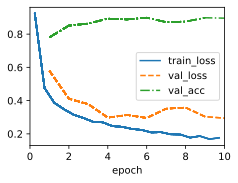

In [ ]:
model = RegNetX32(lr=0.05)
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128, resize=(96, 96))
trainer.fit(model, data)

Exercises

1. Untuk merancang RegNetX yang lebih dalam dengan empat tahap (stages), kita dapat menambah jumlah lapisan dan memperkenalkan lebih banyak blok dalam setiap tahap. Desain ini dapat mencakup:

  Pengaturan Dimensi: Menentukan dimensi setiap tahap untuk memfasilitasi pertumbuhan fitur yang berkelanjutan. Misalnya, setiap tahap dapat memiliki jumlah saluran yang meningkat secara bertahap.

  Penggunaan Shortcut Connections: Menyediakan koneksi shortcut untuk memperbaiki aliran informasi dan mengatasi masalah vanishing gradient.

  Optimasi Parameter: Mengoptimalkan hyperparameter seperti jumlah grup, ukuran kernel, dan stride untuk memastikan bahwa model dapat belajar representasi yang lebih baik.

  Dengan pendekatan ini, kita dapat memperoleh model yang lebih dalam dan memiliki performa yang lebih baik pada berbagai tugas pengenalan citra.

2. Mengganti Blok ResNeXt dengan Blok ResNet dalam RegNet
Dengan mengganti blok ResNeXt dengan blok ResNet dalam arsitektur RegNet, model yang dihasilkan cenderung memiliki performa yang berbeda. ResNeXt menawarkan kapasitas yang lebih tinggi dalam belajar karena fitur grup dan pengolahan paralel yang lebih baik. Sebaliknya, menggunakan ResNet mungkin menghasilkan model yang lebih sederhana tetapi dengan jumlah parameter yang lebih sedikit.

  Hasil eksperimen dapat menunjukkan bahwa meskipun model baru (De-ResNeXt) mungkin lebih efisien dalam hal penggunaan memori, performanya bisa menurun karena kehilangan keuntungan dari fitur agregasi yang kuat di dalam ResNeXt. Oleh karena itu, penting untuk mengevaluasi trade-off antara kompleksitas dan akurasi saat melakukan penggantian ini.

3. Mengimplementasikan Beberapa Instance Keluarga “VioNet”
Ketika kita mengimplementasikan “VioNet” dengan melanggar prinsip desain RegNetX, misalnya dengan mengubah jumlah saluran, jumlah grup, atau cara penggabungan, kita dapat mengamati perbedaan performa. Dalam hal ini:

  d_i (depth): Meningkatkan kedalaman jaringan dapat meningkatkan performa hingga titik tertentu, tetapi bisa menyebabkan overfitting.

  c_i (width): Mengubah jumlah saluran dapat memengaruhi kemampuan jaringan untuk mengekstraksi fitur, tetapi juga bisa meningkatkan konsumsi memori.
  
  g_i (group): Mengubah jumlah grup dapat memengaruhi cara fitur dipelajari dan bagaimana redundansi dalam model diatasi.
  
  b_i (bottleneck): Memperkenalkan bottleneck dapat mengurangi jumlah parameter tanpa mengorbankan terlalu banyak performa, tetapi juga dapat membatasi kapasitas model.

  Melalui eksperimen ini, c_i (jumlah saluran) sering kali merupakan faktor yang paling signifikan karena secara langsung memengaruhi kapasitas representasional jaringan.

4. Mendesain MLP "Sempurna" Menggunakan Prinsip Desain RegNet
Dalam merancang MLP "sempurna", prinsip-prinsip desain yang diperkenalkan sebelumnya dapat diadopsi, seperti:

  Pengaturan Dimensi Bertahap: Memilih ukuran lapisan yang bertahap dan berkorespondensi untuk meningkatkan representasi fitur.

  Konektivitas: Menerapkan konektivitas dens, di mana setiap lapisan terhubung ke semua lapisan sebelumnya, untuk memungkinkan pertukaran informasi yang lebih baik.

  Ekstrapolasi dari Jaringan Kecil ke Besar: Dengan melakukan eksperimen pada arsitektur kecil, kita bisa mengidentifikasi pola kinerja yang bisa diekstrapolasi ke model yang lebih besar.